In [2]:
import tensorflow as tf

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
import matplotlib.pyplot as plt

In [5]:
x_train[0].shape

(28, 28)

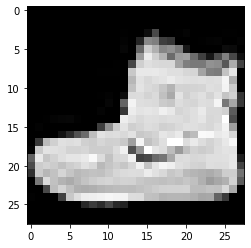

In [6]:
plt.imshow(x_train[0], cmap='gray')

In [7]:
28*28*1

784

In [8]:
encoder_input = tf.keras.Input((28,28,1))
x = tf.keras.layers.Flatten()(encoder_input)
x = tf.keras.layers.Dense(800, activation=None)(x)
x = tf.keras.layers.Dense(400, activation=None)(x)
x = tf.keras.layers.Dense(200, activation=None)(x)
x = tf.keras.layers.Dense(100, activation=None)(x)
encoder_output = tf.keras.layers.Dense(50, activation=None)(x)
#x = tf.keras.layers.Dense(25, activation=None)(x)
#x = tf.keras.layers.Dense(12, activation=None)(x)
#encoder_output = tf.keras.layers.Dense(9, activation=None)(x)

encoder = tf.keras.Model(encoder_input, encoder_output)
print(encoder.summary())

decoder_input = tf.keras.layers.Dense(50, activation=None)(encoder_output)
#x = tf.keras.layers.Dense(12, activation=None)(decoder_input)
#x = tf.keras.layers.Dense(25, activation=None)(x)
#x = tf.keras.layers.Dense(50, activation=None)(x)
x = tf.keras.layers.Dense(100, activation=None)(decoder_input)
x = tf.keras.layers.Dense(200, activation=None)(x)
x = tf.keras.layers.Dense(400, activation=None)(x)
x = tf.keras.layers.Dense(800, activation=None)(x)
x = tf.keras.layers.Dense(784, activation=None)(x)
decoder_output = tf.keras.layers.Reshape((28,28,1))(x)

decoder = tf.keras.Model(decoder_input, decoder_output)

print(decoder.summary())

model = tf.keras.Sequential([encoder, decoder])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 400)               320400    
                                                                 
 dense_2 (Dense)             (None, 200)               80200     
                                                                 
 dense_3 (Dense)             (None, 100)               20100     
                                                                 
 dense_4 (Dense)             (None, 50)                5050  

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-06), loss='mse')

In [17]:
model.fit(x_train,x_train, epochs=1)

1875/1875 [==============================] - 24s 13ms/step - loss: 3408.3152


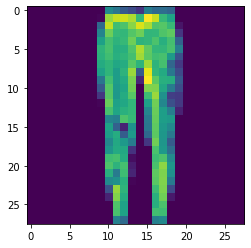

In [23]:
plt.imshow(x_train[78])

In [19]:
model.evaluate(x_test,x_test)

313/313 [==============================] - 1s 4ms/step - loss: 3318.4556


3318.45556640625

1/1 [==============================] - 0s 14ms/step


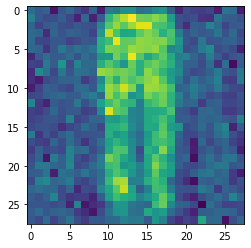

In [24]:
plt.imshow(model.predict(tf.reshape(x_train[78],(1,28,28)))[0])

1/1 [==============================] - 0s 14ms/step


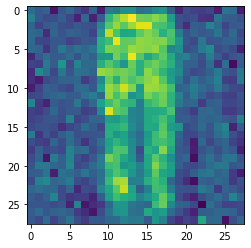

In [25]:
plt.imshow(decoder.predict(encoder.predict(tf.reshape(x_train[78], (1,28,28))))[0])